<a href="https://colab.research.google.com/github/rneelima999/IT496/blob/main/NeelimaR_496Code0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [53]:
titanicTrain=pd.read_csv('/content/drive/MyDrive/it 496/cleanTitanicTrain.csv')
titanicTest=pd.read_csv('/content/drive/MyDrive/it 496/cleanTitanicTest.csv')

In [54]:
predictorNames=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
trainPredictors = titanicTrain[predictorNames]


In [55]:
#crfeate a list with a single value:survived, not survived
targetName=["Survived"]
trainTarget = titanicTrain["Survived"]
#you do same to pick 7 of 12 features from the test dataset
testPredictors = titanicTest[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

In [56]:
#create an instace of the decision tree with specific parameters
DTree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf=1,  min_weight_fraction_leaf=0.0, max_leaf_nodes=6)
#training the decision tree instance you created above
DTree.fit(trainPredictors,trainTarget)
testTarget = DTree.predict(testPredictors)
#the accuracy of the model for the training data
acc_decision_tree = round(DTree.score(trainPredictors, trainTarget) * 100, 2)
print (acc_decision_tree)

81.93


In [58]:
import matplotlib.pyplot as plt
from sklearn import tree

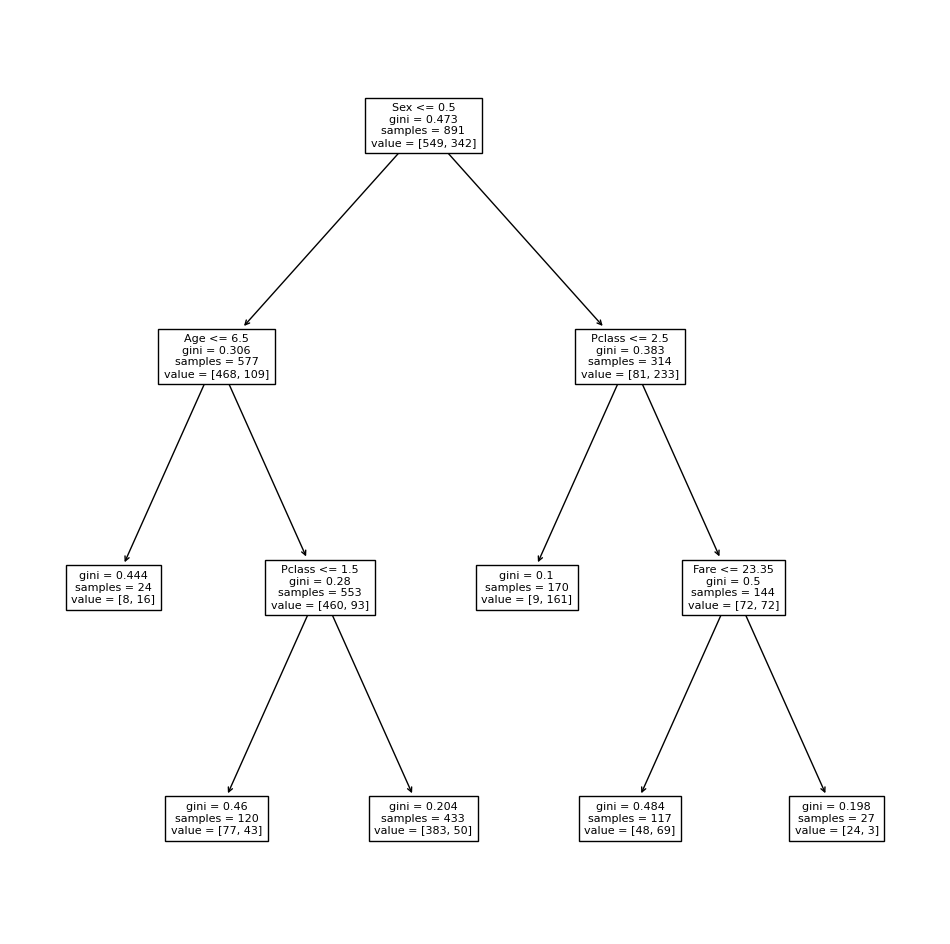

In [59]:
plt.figure(figsize=(12,12))
tree.plot_tree(DTree, fontsize=8, feature_names=predictorNames)
plt.savefig('tree_high_dpi', dpi=500)

In [60]:
titanicTrain.describe()
print(titanicTrain['Sex'].value_counts()[0])
print(titanicTrain['Survived'].value_counts()[1])

577
342


In [64]:
testPIDs = titanicTest['PassengerId']
mySubmission= pd.DataFrame({'PassengerID': testPIDs, 'Survived': testTarget})
mySubmission.to_csv('/content/drive/MyDrive/it 496/mySubmission.csv', index=False)